**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

### **Aprendizaje No Supervisado**
### Clustering

---



Utilizar la base de jugadores “female_players.csv” disponible en la página de [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset). Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia.

1. Análisis exploratorio inicial de la base.
2. Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.
3. Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?
4. Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 
5. Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?
6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.



# Paquetes de Python y Setup

Se importan los paquetes necesarios para este notebook

In [1]:
import warnings
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import manifold



Se configuran los siguientes módulos 

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')
color = sns.color_palette('tab10')

# Analisis exploratorio inicial de la base



Se crea el dataframe a partir del archivo `female_players.csv`

In [3]:
df = pd.read_csv('Data/female_players.csv', low_memory=False)

Primero se observa lo que contiene el dataset mediante `.head()`

In [4]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,...,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,...,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,...,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,NaN,NaN,30,1991-10-28,171,6

Cada jugadora tiene datos referidos a como posición, estadísticas y atributos. También tienen otros datos como version del juego, clausulas, fotos, etc., que pueden no ser relevantes para el análisis. Se obtiene la cantidad de filas y columnas

In [5]:
print(f'Filas: {df.shape[0]}')
print(f'Columnas: {df.shape[1]}')

Filas: 181361
Columnas: 110


Al realizar una revisión inicial del dataset, se identifica que se incluye diversas versiones del juego, por lo que algunas jugadoras podrían aparecer repetidas en cada nueva actualización. Teniendo el valor de la columna player_id, se puede obtener las filas repetidas 

In [6]:
print(f'player_id únicos: {df.player_id.nunique()}')

player_id únicos: 1635


Se confirma que hay solamente 1635 jugadoras direfentes, por lo cual se el dataset, conservando únicamente la versión fifa más reciente


In [7]:
df_players= df.sort_values(by='fifa_update_date', ascending=False).drop_duplicates(subset='player_id', keep='first').reset_index(drop=True)
df_players.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,265164,/player/265164/marina-georgieva/230009,23,9,2023-01-13,M. Georgieva,Marina Georgieva,CB,75,80,7500000.0,700.0,25,1997-04-13,174,67,2218.0,Feminine Division 1,1.0,116034.0,Paris SG W,SUB,23.0,NaN,2022-08-11,2024.0,4,Austria,NaN,NaN,NaN,Right,3,2,1,Medium/High,Stocky (170-185),No,15900000.0,NaN,NaN,68.0,44.0,61.0,67.0,75.0,80.0,59,42,68,...,72,66,58,74,65,88,37,78,72,39,42,44,60.0,75,78,76,13,8,10,8,10,NaN,59+2,59+2,59+2,60,58,58,58,60,60+2,60+2,60+2,62+2,63+2,63+2,63+2,62+2,70+2,72+2,72+2,72+2,70+2,71+2,75+2,75+2,75+2,71+2,17+2,https://cdn.sofifa.net/players/265/164/23_120.png
2,269657,/player/269657/gudhrun-arnardottir/230009,23,9,2023-01-13,G. Arnardóttir,Guðrún Arnardóttir,CB,73,75,NaN,NaN,26,1995-07-29,171,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Iceland,116428.0,SUB,18.0,Right,3,2,1,Medium/High,Normal (170-185),No,NaN,NaN,NaN,71.0,34.0,58.0,69.0,76.0,70.0,32,34,71,...,75,51,33,58,77,69,35,66,74,27,58,51,58.0,82,75,71,9,11,9,13,7,NaN,54+2,54+2,54+2,58,58,58,58,58,62+2,62+2,62+2,62+2,66+2,66+2,66+2,62+2,69+2,73+2,73+2,73+2,69+2,71+2,73+2,73+2,73+2,71+2,17+2,https://cdn.sofifa.net/players/269/657/23_120.png
3,269805,/player/269805/kinga-szemik/230009,23,9,2023-01-13,K. Szemik,Kinga Szemik,GK,73,79,3800000.0,500.0,25,1997-06-25,182,70,2218.0,Feminine Division 1,1.0,116040.0,Stade de Reims W,SUB,30.0,NaN,2022-07-25,2023.0,37,Poland,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (170-185),No,8700000.0,NaN,Comes For Crosses,NaN,NaN,NaN,NaN,NaN,NaN,12,13,11,...,63,45,54,69,32,42,8,22,14,9,41,19,33.0,10,15,13,76,70,72,72,75,38.0,26+2,26+2,26+2,25,27,27,27,25,28+2,28+2,28+2,27+2,28+2,28+2,28+2,27+2,24+2,25+2,25+2,25+2,24+2,24+2,22+2,22+2,22+2,24+2,72+2,https://cdn.sofifa.net/players/269/805/23_120.png
4,269959,/player/269959/justine-lerond/230009,23,9,2023-01-13,J. Lerond,Justine Lerond,GK,73,81,6000000.0,500.0,22,2000-02-29,169,74,2218.0,Feminine Division 1,1.0,116038.0,Bordeaux W,SUB,16.0,NaN,2022-08-10,2024.0,18,France,113003.0,SUB,16.0,Right,2,1,1,Medium/Medium,Stocky (170-),No,14400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,11,12,...,69,45,50,51,32,68,10,29,13,11,31,19,4

Tambien se eliminan columnas que no van a ser relevantes para el desarrollo del trabajo

In [8]:
eliminar_cols = ['player_url', 'fifa_version','fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'wage_eur', 'dob', 'league_level', 'club_jersey_number',
'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nation_jersey_number', 'release_clause_eur', 'real_face', 'player_tags', 'player_traits', 'player_face_url',
'league_name', 'club_name', 'nationality_name', 'value_eur','league_id','club_team_id','club_position', 'goalkeeping_speed', 'nation_team_id', 'nation_position', 
'international_reputation', 'body_type', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

names = df_players['long_name']
df_players = df_players.drop(columns=eliminar_cols)

In [9]:
df_players.head()

,player_id,player_positions,overall,potential,age,height_cm,weight_kg,nationality_id,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,227125,ST,91,91,28,168,66,195,Right,4,4,High/High,87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13
1,265164,CB,75,80,25,174,67,4,Right,3,2,Medium/High,68.0,44.0,61.0,67.0,75.0,80.0,59,42,68,75,42,65,51,38,69,69,67,69,72,72,66,58,74,65,88,37,78,72,39,42,44,60.0,75,78,76,13,8,10,8,10
2,269657,CB,73,75,26,171,68,24,Right,3,2,Medium/High,71.0,34.0,58.0,69.0,76.0,70.0,32,34,71,75,30,68,31,42,68,76,71,71,68,75,51,33,58,77,69,35,66,74,27,58,51,58.0,82,75,71,9,11,9,13,7
3,269805,GK,73,79,25,182,70,37,Right,2,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,12,13,11,31,8,17,16,12,24,22,34,45,42,63,45,54,69,32,42,8,22,14,9,41,19,33.0,10,15,13,76,70,72,72,75
4,269959,GK,73,81,22,169,74,18,Right,2,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,13,11,12,26,9,13,16,14,21,17,37,42,38,69,45,50,51,32,68,10,29,13,11,31,19,41.0,15,13,11,73,70,66,72,77


Todas las columnas relacionadas a habilidades tienen un rango de 0 a 100 

In [10]:
print(df_players.describe())

           player_id      overall    potential          age    height_cm  \
count    1635.000000  1635.000000  1635.000000  1635.000000  1635.000000   
mean   248110.272171    73.976147    77.833639    25.882569   168.201835   
std     16170.621949     5.965736     5.648883     4.505637     6.221896   
min    226177.000000    57.000000    59.000000    16.000000   151.000000   
25%    228722.000000    70.000000    74.000000    22.000000   164.000000   
50%    246582.000000    74.000000    78.000000    26.000000   168.000000   
75%    265260.500000    78.000000    82.000000    29.000000   173.000000   
max    273050.000000    92.000000    94.000000    41.000000   188.000000   

         weight_kg  nationality_id    weak_foot  skill_moves         pace  \
count  1635.000000     1635.000000  1635.000000  1635.000000  1435.000000   
mean     60.795107       64.384098     3.064832     2.596942    70.758188   
std       5.543550       55.927173     0.623454     0.880005     9.361748   
min    

Una vez obtenidas las columnas de interes, se obtienen la cantidad de datos faltantes

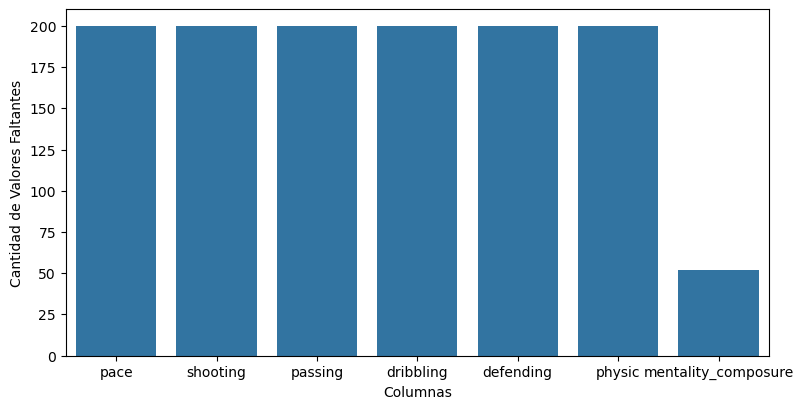

In [11]:
missing_values = df_players.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

plt.figure(figsize=(8, 4))
sns.barplot(data=columns_with_missing)
plt.tight_layout()
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.show()


Luego se imputaran los valores faltantes de estas columnas 


# Evaluacion visual

Dos variables que pueden llegar a hacer la diferencia son:
- Attacking Finishing: este atributo mide la habilidad para finalizar jugadas ofensivas, es decir, su capacidad para convertir oportunidades de gol en goles

- Defending Standing Tackle: este atributo mide la eficacia para realizar entradas de pie (tackles) para recuperar la pelota

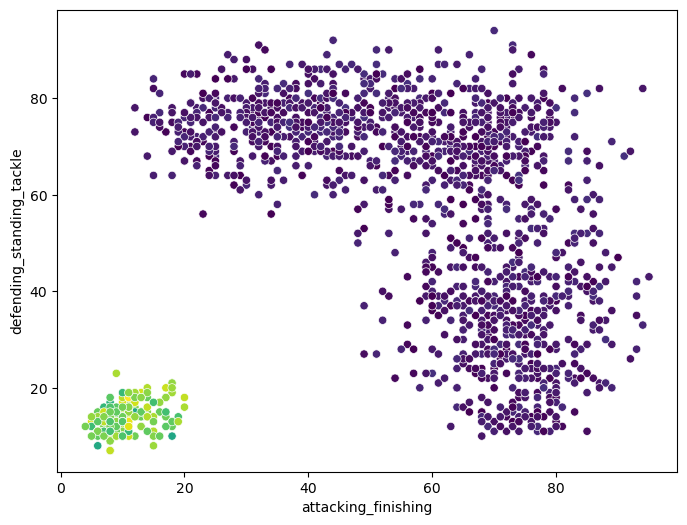

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_players, x='attacking_finishing', y='defending_standing_tackle', hue='goalkeeping_reflexes', palette='viridis', legend=False)
plt.show()

Mediante el parametro `hue` se puede seleccionar que columna utiliza el gráfico para codificar los colores. Se puede observar como se separa un gran grupo de un grupo más pequeño, siendo este último el grupo de las arqueras (GK)

# Normalizacion de los datos  

Se puede observar que cada posicion se le asigna una etiqueta distinta. No todos las jugadoras tienen una etiqueta unica, lo cual genera que cada jugadora pueda tener una combinacion unica de posiciones

In [13]:
print(f"Cantidad de posiciones únicas: {len(df_players['player_positions'].unique())}")

Cantidad de posiciones únicas: 252


Para resolver esto se crean solo cuatro grupos de posiciones

In [14]:
forwards = ['RF', 'ST', 'LW', 'LF', 'RW', 'CF']
midfielders = ['CAM', 'CM', 'LM', 'RM', 'CDM']
defenders = ['CB', 'LB', 'RB', 'RWB', 'LWB']
goalkeepers = ['GK']

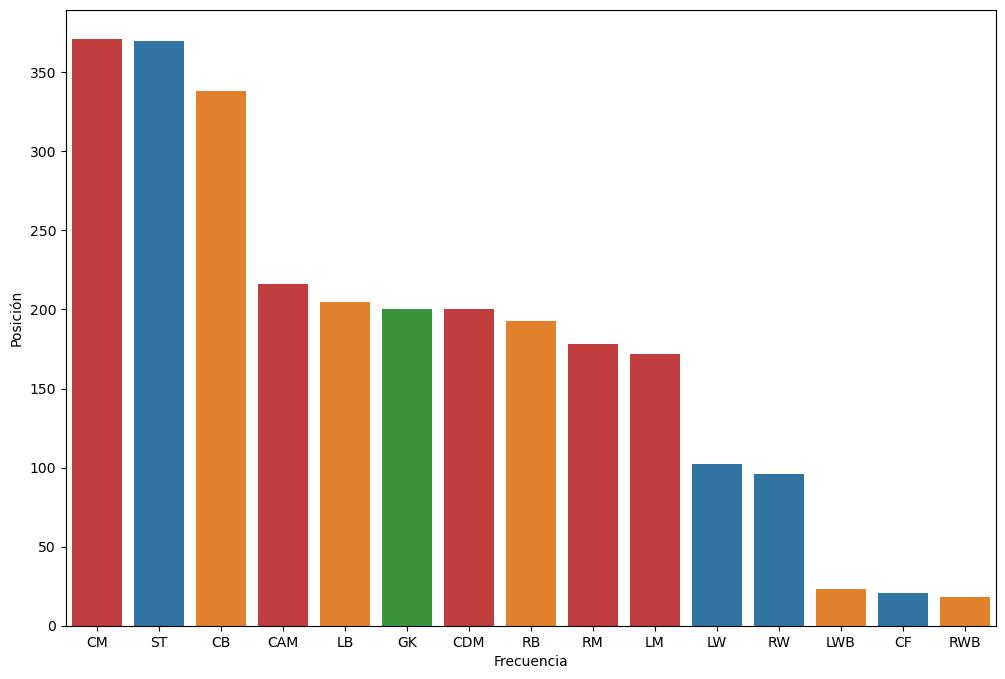

In [15]:
color_map = {
    'Forwards': color[0],
    'Defenders': color[1],
    'Goalkeepers': color[2],
    'Midfielders': color[3]
}

df_players_split = df_players['player_positions'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_players_split = df_players_split.to_frame(name='position')

df_players_split['color'] = df_players_split['position'].apply(
    lambda x: color_map['Forwards'] if x in forwards else
              color_map['Midfielders'] if x in midfielders else
              color_map['Defenders'] if x in defenders else
              color_map['Goalkeepers'] if x in goalkeepers else 'gray'
)

df_positions = df_players_split['position'].value_counts().reset_index()
df_positions.columns = ['position', 'count']
df_positions = pd.merge(df_positions, df_players_split[['position', 'color']].drop_duplicates(), on='position')

plt.figure(figsize=(12, 8))
sns.barplot(x='position', y='count', data=df_positions, palette=df_positions['color'].tolist(), dodge=False)
plt.xlabel('Frecuencia')
plt.ylabel('Posición')
plt.show()

Se crea una funcion que recategoriza las posiciones:

In [16]:
def player_position(position):
    if any(valor in position for valor in forwards):
        return 'Forward'

    elif any(valor in position for valor in midfielders):
        return 'Midfielder'

    elif any(valor in position for valor in defenders):
        return 'Defender'

    elif any(valor in position for valor in goalkeepers):
        return 'GK'

    else:
        return 'nan'

Se crea la nueva columna con las posiciones 

In [17]:
df_players["Position"]=df_players['player_positions'].apply(lambda x: player_position(x))
df_players.drop(columns=['player_positions'], axis=1, inplace=True)
col_position = df_players["Position"]
df_players["Position"].value_counts()

#df_players = df_players.drop(columns=['player_id'])


Position
Midfielder    541
Forward       494
Defender      400
GK            200
Name: count, dtype: int64

Se codifican las variables categóricas y imputan los valores falantes

In [18]:
df_players = pd.get_dummies(df_players, columns=['Position'],prefix='Position', drop_first = False)
df_players = pd.get_dummies(df_players, columns=['preferred_foot'],prefix='preferred_foot', drop_first = False)
df_players = pd.get_dummies(df_players, columns=['work_rate'],prefix='work_rate', drop_first = False)

In [19]:
df_players['passing'].fillna(df_players['passing'].mean(), inplace = True)
df_players['dribbling'].fillna(df_players['dribbling'].mean(), inplace = True)
df_players['defending'].fillna(df_players['defending'].mean(), inplace = True)
df_players['physic'].fillna(df_players['physic'].mean(), inplace = True)
df_players['mentality_composure'].fillna(df_players['mentality_composure'].mean(), inplace = True)
df_players['pace'].fillna(df_players['pace'].mean(), inplace = True)
df_players['shooting'].fillna(df_players['shooting'].mean(), inplace = True)

In [20]:
df_players.describe()

,player_id,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,248110.272171,73.976147,77.833639,25.882569,168.201835,60.795107,64.384098,3.064832,2.596942,70.758188,59.283624,64.276655,68.935192,57.583275,66.282927,54.406728,52.571865,57.093578,66.351070,46.379817,60.183486,51.122324,47.839755,58.180428,65.760856,66.278287,66.924771,63.955352,71.298471,69.473394,60.880122,66.174924,65.734557,65.128440,52.771254,55.718654,51.533945,55.507645,58.369419,53.798165,62.820594,50.770031,53.092355,49.988379,18.071560,18.011621,17.912538,18.012844,18.356575
std,16170.621949,5.965736,5.648883,4.505637,6.221896,5.543550,55.927173,0.623454,0.880005,8.770119,14.900148,9.310080,8.995816,18.140294,8.274703,20.687045,23.697480,20.330872,17.434341,21.355176,21.690193,20.045626,18.400149,18.102384,19.384682,14.865336,14.573365,13.798953,8.221622,12.559420,15.392668,10.457642,15.426114,12.719481,22.396484,19.054110,25.241149,23.779828,16.511056,17.550999,14.187222,24.642878,24.956327,24.222939,20.760283,20.374655,20.157679,20.653354,21.203437
min,226177.000000,57.000000,59.000000,16.000000,151.000000,45.000000,4.000000,1.000000,1.000000,33.000000,20.000000,28.000000,33.000000,16.000000,36.000000,5.000000,4.000000,6.000000,11.000000,4.000000,4.000000,8.000000,8.000000,14.000000,8.000000,15.000000,16.000000,21.000000,37.000000,27.000000,13.000000,15.000000,14.000000,23.000000,5.000000,12.000000,4.000000,4.000000,10.000000,10.000000,11.000000,5.000000,7.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,228722.000000,70.000000,74.000000,22.000000,164.000000,57.000000,18.000000,3.000000,2.000000,66.000000,50.000000,59.000000,65.000000,43.000000,61.000000,42.000000,34.000000,48.000000,64.000000,30.000000,55.000000,37.000000,36.000000,49.000000,64.000000,60.000000,62.000000,57.000000,67.000000,63.000000,52.000000,59.000000,62.000000,58.000000,37.000000,42.000000,25.000000,41.000000,47.000000,44.000000,57.000000,28.000000,29.000000,27.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,246582.000000,74.000000,78.000000,26.000000,168.000000,60.000000,45.000000,3.000000,3.000000,70.758188,59.283624,64.276655,69.000000,60.000000,66.282927,59.000000,59.000000,63.000000,71.000000,48.000000,67.000000,56.000000,50.000000,64.000000,71.000000,69.000000,70.000000,66.000000,72.000000,72.000000,63.000000,67.000000,69.000000,67.000000,60.000000,59.000000,63.000000,64.000000,61.000000,56.000000,64.000000,57.000000,64.000000,56.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,265260.500000,78.000000,82.000000,29.000000,173.000000,65.000000,83.000000,3.000000,3.000000,76.000000,70.000000,70.000000,74.000000,72.0000

In [21]:

df_players = df_players.drop(columns=['player_id'])

In [22]:
df_players.head()

,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Defender,Position_Forward,Position_GK,Position_Midfielder,preferred_foot_Left,preferred_foot_Right,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,91,91,28,168,66,195,4,4,87.000000,91.000000,74.000000,90.000000,42.000000,83.000000,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
1,75,80,25,174,67,4,3,2,68.000000,44.000000,61.000000,67.000000,75.000000,80.000000,59,42,68,75,42,65,51,38,69,69,67,69,72,72,66,58,74,65,88,37,78,72,39,42,44,60.0,75,78,76,13,8,10,8,10,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,73,75,26,171,68,24,3,2,71.000000,34.000000,58.000000,69.000000,76.000000,70.000000,32,34,71,75,30,68,31,42,68,76,71,71,68,75,51,33,58,77,69,35,66,74,27,58,51,58.0,82,75,71,9,11,9,13,7,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,73,79,25,182,70,37,2,1,70.758188,59.283624,64.276655,68.935192,57.583275,66.282927,12,13,11,31,8,17,16,12,24,22,34,45,42,63,45,54,69,32,42,8,22,14,9,41,19,33.0,10,15,13,76,70,72,72,75,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
4,73,81,22,169,74,18,2,1,70.758188,59.283624,64.276655,68.935192,57.583275,66.282927,13,11,12,26,9,13,16,14,21,17,37,42,38,69,45,50,51,32,68,10,29,13,11,31,19,41.0,15,13,11,73,70,66,72,77,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True


Finalmente se escalan los datos mediante `StandardScaler()`

In [23]:
scaler = StandardScaler()

df_std = scaler.fit_transform(df_players)

df_std = pd.DataFrame(df_std, columns=df_players.columns)
df_std.head()

,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Defender,Position_Forward,Position_GK,Position_Midfielder,preferred_foot_Left,preferred_foot_Right,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,2.854478,2.331503,0.470095,-0.032449,0.939197,2.336179,1.500438,1.594862,1.852515,2.129246,1.044709,2.342339e+00,-0.859305,2.020881,0.754001,1.706532,1.668241,0.668364,2.136912,1.375075,1.241432,1.095992,0.321579,1.354016,1.528971,1.240672,1.888014,2.397040,0.997692,1.957367,2.374596,1.378957,1.641415,1.618104,0.749745,-1.091169,1.661258,1.249883,1.208383,2.057368,-0.274810,-0.564853,-0.825436,-0.533468,-0.295144,-0.491900,-0.097488,-0.252705,-0.569110,1.519775,-0.373327,-0.703218,-0.460444,0.460444,4.625717,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,-1.218525
1,0.171675,0.383620,-0.195941,0.932182,1.119642,-1.080022,-0.104020,-0.678547,-0.314595,-1.026050,-0.352055,-2.151871e-01,0.960406,1.658219,0.222104,-0.446254,0.536610,0.496238,-0.205157,0.222127,-0.006104,-0.534929,0.597871,0.167149,0.048565,0.142442,0.583168,0.085353,-0.276642,-0.187167,0.748493,-0.047632,1.798702,-0.704400,1.169730,0.811069,-0.694399,-0.991725,-0.558439,-0.198873,0.983545,0.998355,1.074171,-0.244366,-0.491527,-0.392652,-0.484953,-0.394235,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525
2,-0.163676,-0.501782,0.026071,0.449866,1.300087,-0.722305,-0.104020,-0.678547,0.027581,-1.697390,-0.674385,7.206482e-03,1.015549,0.449347,-1.083460,-0.783946,0.684214,0.496238,-0.767253,0.360481,-1.004133,-0.317473,0.542612,0.528370,0.317730,0.279721,0.293202,0.450357,-1.471330,-1.811814,-0.781957,0.730507,0.304473,-0.793727,0.539752,0.890329,-1.199183,-0.022381,-0.159479,-0.339888,1.267690,0.878108,0.867692,-0.437101,-0.344240,-0.442276,-0.242788,-0.535765,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525
3,-0.163676,0.206540,-0.195941,2.218357,1.660977,-0.489788,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.050544,-1.670387,-2.267865,-2.028289,-1.797764,-1.991531,-1.752655,-1.948393,-1.888750,-2.258187,-2.172044,-1.504902,-1.591575,-1.009656,-1.949205,-0.447111,0.270227,-2.187516,-1.818904,-1.999642,-1.770168,-1.487469,-1.956359,-1.052309,-1.983295,-2.102576,-1.654941,-1.526828,-1.527465,2.791203,2.552401,2.684040,2.614765,2.672244,-0.569110,-0.657992,2.678619,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,0.820665
4,-0.163676,0.560700,-0.861977,0.128323,2.382757,-0.829620,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.002190,-1.754810,-2.218664,-2.315167,-1.750922,-2.176003,-1.752655,-1.839665,-2.054525,-2.516202,-1.970170,-1.710820,-1.881541,-0.279650,-1.949205,-0.707054,-1.451529,-2.187516,0.225830,-1.910315,-1.402681,-1.527099,-1.872228,-1.658149,-1.983295,-1.538516,-1.451980,-1.606992,-1.610057,2.646652,2.552401,2.386295,2.614765,2.766597,-0.569

# Aplicacion de clustering

## K-Means

Para determinar el número optimo de clusters al aplicar K-Means se utiliza el **método del codo.** Este método se utiliza para encontrar el número optimo de de clusters observando un gráfica de inercia vs. número de clusters. El punto donde la inercia disminuye de forma lenta, formando un "codo", indica el número adecuado de clusters 

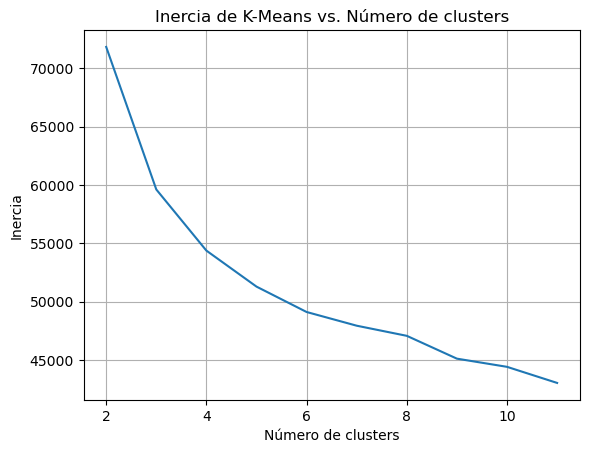

In [24]:
scores = [KMeans(n_clusters=i).fit(df_std).inertia_ for i in range(2,12)] 

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de K-Means vs. Número de clusters")
plt.grid()
plt.show()

Se puede observar que la curva se plana con un número de clusters igual a **4**. Tambien, 4 son las posiciones de jugadores creadas anteriormente:
- Arquero
- Defensor
- Mediocampista
- Delantero

In [25]:
n_clust = 4
km = KMeans(n_clusters=n_clust)
#km.fit(df_minmax) 
km.fit(df_std)

df_kmean=df_std.copy()
#df_kmean=df_minmax.copy()

df_kmean['kmeans_4'] = km.labels_ #clusters

In [26]:
df_kmean = pd.concat([df_kmean, col_position, names],axis=1)
df_kmean.head()

,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Defender,Position_Forward,Position_GK,Position_Midfielder,preferred_foot_Left,preferred_foot_Right,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,kmeans_4,Position,long_name
0,2.854478,2.331503,0.470095,-0.032449,0.939197,2.336179,1.500438,1.594862,1.852515,2.129246,1.044709,2.342339e+00,-0.859305,2.020881,0.754001,1.706532,1.668241,0.668364,2.136912,1.375075,1.241432,1.095992,0.321579,1.354016,1.528971,1.240672,1.888014,2.397040,0.997692,1.957367,2.374596,1.378957,1.641415,1.618104,0.749745,-1.091169,1.661258,1.249883,1.208383,2.057368,-0.274810,-0.564853,-0.825436,-0.533468,-0.295144,-0.491900,-0.097488,-0.252705,-0.569110,1.519775,-0.373327,-0.703218,-0.460444,0.460444,4.625717,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,-1.218525,0,Forward,Samantha May Kerr
1,0.171675,0.383620,-0.195941,0.932182,1.119642,-1.080022,-0.104020,-0.678547,-0.314595,-1.026050,-0.352055,-2.151871e-01,0.960406,1.658219,0.222104,-0.446254,0.536610,0.496238,-0.205157,0.222127,-0.006104,-0.534929,0.597871,0.167149,0.048565,0.142442,0.583168,0.085353,-0.276642,-0.187167,0.748493,-0.047632,1.798702,-0.704400,1.169730,0.811069,-0.694399,-0.991725,-0.558439,-0.198873,0.983545,0.998355,1.074171,-0.244366,-0.491527,-0.392652,-0.484953,-0.394235,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,1,Defender,Marina Georgieva
2,-0.163676,-0.501782,0.026071,0.449866,1.300087,-0.722305,-0.104020,-0.678547,0.027581,-1.697390,-0.674385,7.206482e-03,1.015549,0.449347,-1.083460,-0.783946,0.684214,0.496238,-0.767253,0.360481,-1.004133,-0.317473,0.542612,0.528370,0.317730,0.279721,0.293202,0.450357,-1.471330,-1.811814,-0.781957,0.730507,0.304473,-0.793727,0.539752,0.890329,-1.199183,-0.022381,-0.159479,-0.339888,1.267690,0.878108,0.867692,-0.437101,-0.344240,-0.442276,-0.242788,-0.535765,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,1,Defender,Guðrún Arnardóttir
3,-0.163676,0.206540,-0.195941,2.218357,1.660977,-0.489788,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.050544,-1.670387,-2.267865,-2.028289,-1.797764,-1.991531,-1.752655,-1.948393,-1.888750,-2.258187,-2.172044,-1.504902,-1.591575,-1.009656,-1.949205,-0.447111,0.270227,-2.187516,-1.818904,-1.999642,-1.770168,-1.487469,-1.956359,-1.052309,-1.983295,-2.102576,-1.654941,-1.526828,-1.527465,2.791203,2.552401,2.684040,2.614765,2.672244,-0.569110,-0.657992,2.678619,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,0.820665,2,GK,Kinga Szemik
4,-0.163676,0.560700,-0.861977,0.128323,2.382757,-0.829620,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.002190,-1.754810,-2.218664,-2.315167,-1.750922,-2.176003,-1.752655,-1.839665,-2.054525,-2.516202,-1.970170,-1.710820,-1.881541,-0.279650,-1.949205,-0.707054,-1.451529,-2.187516,0.225830,-1.910315,-1.402681

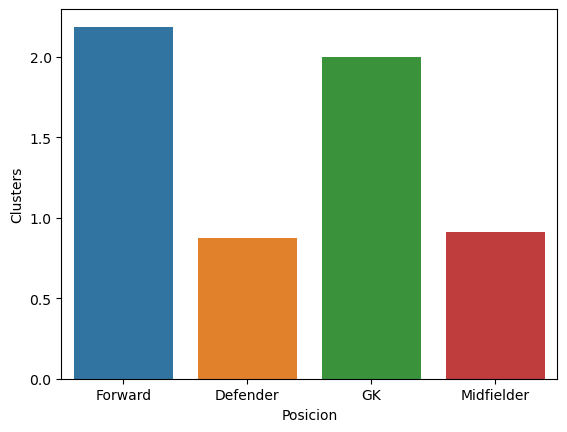

In [27]:
sns.barplot(data=df_kmean, x='Position', y='kmeans_4', errorbar=None, palette='tab10')
plt.xlabel('Posicion')
plt.ylabel('Clusters')
plt.show()

In [28]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
clusters = df_kmean['kmeans_4'].unique()  
position = df_kmean['Position'].unique()

fig = go.Figure()

for i, cluster in enumerate(clusters):
    cluster_data = df_kmean[df_kmean['kmeans_4'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['attacking_finishing'],
        y=cluster_data['goalkeeping_reflexes'],
        z=cluster_data['defending_standing_tackle'],
        mode='markers',
        marker=dict(size=4, color=colors[i], opacity=0.6),
        name=f'Cluster {cluster}: {position[i]}' 
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='attacking_finishing',
        yaxis_title='goalkeeping_reflexes',
        zaxis_title='defending_standing_tackle'
    ),
    title="K-Means",
    legend=dict(title="Clusters"),  # Título de la leyenda
    width=800, height=600,
    margin=dict(t=30, r=0, l=20, b=10)
)

fig.show()

## Mezcla de Gaussianas

Al igual que en Kmeans, el número de clusters es un hiperparámetro. Decidimos usar entonces 4 clusters para comparar el rendimiento de ambos métodos

In [29]:
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(df_std)

labels = gmm.predict(df_std)
df_clusters_GM=df_std.copy()
df_clusters_GM['GM_4'] = labels #clusters
df_clusters_GM.head(4)

,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Defender,Position_Forward,Position_GK,Position_Midfielder,preferred_foot_Left,preferred_foot_Right,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,GM_4
0,2.854478,2.331503,0.470095,-0.032449,0.939197,2.336179,1.500438,1.594862,1.852515,2.129246,1.044709,2.342339e+00,-0.859305,2.020881,0.754001,1.706532,1.668241,0.668364,2.136912,1.375075,1.241432,1.095992,0.321579,1.354016,1.528971,1.240672,1.888014,2.397040,0.997692,1.957367,2.374596,1.378957,1.641415,1.618104,0.749745,-1.091169,1.661258,1.249883,1.208383,2.057368,-0.274810,-0.564853,-0.825436,-0.533468,-0.295144,-0.491900,-0.097488,-0.252705,-0.569110,1.519775,-0.373327,-0.703218,-0.460444,0.460444,4.625717,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,-1.218525,1
1,0.171675,0.383620,-0.195941,0.932182,1.119642,-1.080022,-0.104020,-0.678547,-0.314595,-1.026050,-0.352055,-2.151871e-01,0.960406,1.658219,0.222104,-0.446254,0.536610,0.496238,-0.205157,0.222127,-0.006104,-0.534929,0.597871,0.167149,0.048565,0.142442,0.583168,0.085353,-0.276642,-0.187167,0.748493,-0.047632,1.798702,-0.704400,1.169730,0.811069,-0.694399,-0.991725,-0.558439,-0.198873,0.983545,0.998355,1.074171,-0.244366,-0.491527,-0.392652,-0.484953,-0.394235,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,3
2,-0.163676,-0.501782,0.026071,0.449866,1.300087,-0.722305,-0.104020,-0.678547,0.027581,-1.697390,-0.674385,7.206482e-03,1.015549,0.449347,-1.083460,-0.783946,0.684214,0.496238,-0.767253,0.360481,-1.004133,-0.317473,0.542612,0.528370,0.317730,0.279721,0.293202,0.450357,-1.471330,-1.811814,-0.781957,0.730507,0.304473,-0.793727,0.539752,0.890329,-1.199183,-0.022381,-0.159479,-0.339888,1.267690,0.878108,0.867692,-0.437101,-0.344240,-0.442276,-0.242788,-0.535765,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,3
3,-0.163676,0.206540,-0.195941,2.218357,1.660977,-0.489788,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.050544,-1.670387,-2.267865,-2.028289,-1.797764,-1.991531,-1.752655,-1.948393,-1.888750,-2.258187,-2.172044,-1.504902,-1.591575,-1.009656,-1.949205,-0.447111,0.270227,-2.187516,-1.818904,-1.999642,-1.770168,-1.487469,-1.956359,-1.052309,-1.983295,-2.102576,-1.654941,-1.526828,-1.527465,2.791203,2.552401,2.684040,2.614765,2.672244,-0.569110,-0.657992,2.678619,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,0.820665,2


In [30]:
df_clusters_GM_position_name = pd.concat([df_clusters_GM, col_position, names],axis=1)

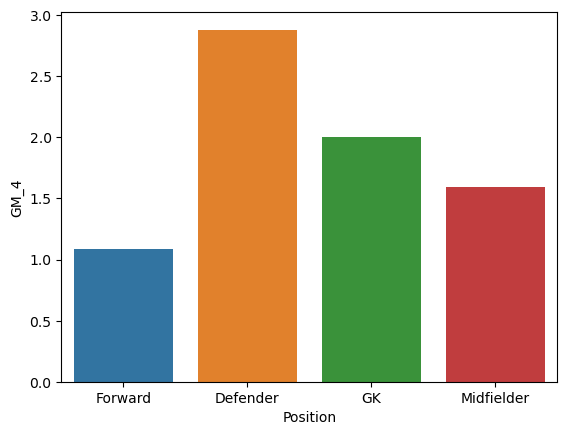

In [31]:
sns.barplot(data=df_clusters_GM_position_name, x='Position', y='GM_4', errorbar=None, palette='tab10')
plt.show()

In [32]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
clusters = df_clusters_GM_position_name['GM_4'].unique()  
position = df_clusters_GM_position_name['Position'].unique()

fig = go.Figure()

for i, cluster in enumerate(clusters):
    cluster_data = df_clusters_GM[df_clusters_GM['GM_4'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['attacking_finishing'],
        y=cluster_data['goalkeeping_reflexes'],
        z=cluster_data['defending_standing_tackle'],
        mode='markers',
        marker=dict(size=4, color=colors[i], opacity=0.6),
        name=f'Cluster {cluster}: {position[i]}' 
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='attacking_finishing',
        yaxis_title='goalkeeping_reflexes',
        zaxis_title='defending_standing_tackle'
    ),
    title="GM",
    legend=dict(title="Clusters"),  # Título de la leyenda
    width=800, height=600,
    margin=dict(t=30, r=0, l=20, b=10)
)

fig.show()

# Evaluacion de los resultados

K-Means:

Se crearon cuatro clusters que coinciden con las posiciones de las jugadoras. Nuevamente se logra separar con facilidad el cluster de arqueras (GK). Tambien se puede apreciar una diferencia entre Defensoras y Mediocampistas pero con una gran dispersion entre ambas de Atacantes.


Mezcla de Gaussianas:

Se crearon cuatro clusters que coinciden con las posiciones de las jugadoras. Nuevamente se logra separar con facilidad el cluster de arqueras (GK). Tambien se puede apreciar una diferencia entre Atacantes y Defensoras pero con una pequeña dispersion de los valores de Mediocampistas. Como se pudo ver en los gráficos, la posicion Mediocampista posee caracteristicas de atacante y defensor

# Aplicación de Embedding

## K-Means

In [33]:
df_kmean.head().drop(columns=['long_name'])

,overall,potential,age,height_cm,weight_kg,nationality_id,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Defender,Position_Forward,Position_GK,Position_Midfielder,preferred_foot_Left,preferred_foot_Right,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,kmeans_4,Position
0,2.854478,2.331503,0.470095,-0.032449,0.939197,2.336179,1.500438,1.594862,1.852515,2.129246,1.044709,2.342339e+00,-0.859305,2.020881,0.754001,1.706532,1.668241,0.668364,2.136912,1.375075,1.241432,1.095992,0.321579,1.354016,1.528971,1.240672,1.888014,2.397040,0.997692,1.957367,2.374596,1.378957,1.641415,1.618104,0.749745,-1.091169,1.661258,1.249883,1.208383,2.057368,-0.274810,-0.564853,-0.825436,-0.533468,-0.295144,-0.491900,-0.097488,-0.252705,-0.569110,1.519775,-0.373327,-0.703218,-0.460444,0.460444,4.625717,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,-1.218525,0,Forward
1,0.171675,0.383620,-0.195941,0.932182,1.119642,-1.080022,-0.104020,-0.678547,-0.314595,-1.026050,-0.352055,-2.151871e-01,0.960406,1.658219,0.222104,-0.446254,0.536610,0.496238,-0.205157,0.222127,-0.006104,-0.534929,0.597871,0.167149,0.048565,0.142442,0.583168,0.085353,-0.276642,-0.187167,0.748493,-0.047632,1.798702,-0.704400,1.169730,0.811069,-0.694399,-0.991725,-0.558439,-0.198873,0.983545,0.998355,1.074171,-0.244366,-0.491527,-0.392652,-0.484953,-0.394235,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,1,Defender
2,-0.163676,-0.501782,0.026071,0.449866,1.300087,-0.722305,-0.104020,-0.678547,0.027581,-1.697390,-0.674385,7.206482e-03,1.015549,0.449347,-1.083460,-0.783946,0.684214,0.496238,-0.767253,0.360481,-1.004133,-0.317473,0.542612,0.528370,0.317730,0.279721,0.293202,0.450357,-1.471330,-1.811814,-0.781957,0.730507,0.304473,-0.793727,0.539752,0.890329,-1.199183,-0.022381,-0.159479,-0.339888,1.267690,0.878108,0.867692,-0.437101,-0.344240,-0.442276,-0.242788,-0.535765,1.757128,-0.657992,-0.373327,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,3.687576,-0.173913,-1.218525,1,Defender
3,-0.163676,0.206540,-0.195941,2.218357,1.660977,-0.489788,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.050544,-1.670387,-2.267865,-2.028289,-1.797764,-1.991531,-1.752655,-1.948393,-1.888750,-2.258187,-2.172044,-1.504902,-1.591575,-1.009656,-1.949205,-0.447111,0.270227,-2.187516,-1.818904,-1.999642,-1.770168,-1.487469,-1.956359,-1.052309,-1.983295,-2.102576,-1.654941,-1.526828,-1.527465,2.791203,2.552401,2.684040,2.614765,2.672244,-0.569110,-0.657992,2.678619,-0.703218,-0.460444,0.460444,-0.216183,-0.177611,-0.477912,-0.127118,-0.024739,-0.1663,-0.271181,-0.173913,0.820665,2,GK
4,-0.163676,0.560700,-0.861977,0.128323,2.382757,-0.829620,-1.708478,-1.815251,0.000000,0.000000,0.000000,1.580202e-15,0.000000,0.000000,-2.002190,-1.754810,-2.218664,-2.315167,-1.750922,-2.176003,-1.752655,-1.839665,-2.054525,-2.516202,-1.970170,-1.710820,-1.881541,-0.279650,-1.949205,-0.707054,-1.451529,-2.187516,0.225830,-1.910315,-1.402681,-1.527099,-1.872228,-1.658149,-1.983295,-1.538516,-1.451980,-1.606992,-1.610

In [34]:
time_start = time.time()
tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
kmean_tsne = tsne.fit_transform(df_kmean.drop(columns=['long_name', 'Position']))
print ('[t-SNE] Done in {:.3f}s'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1635 samples in 0.003s...
[t-SNE] Computed neighbors for 1635 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1635
[t-SNE] Computed conditional probabilities for sample 1635 / 1635
[t-SNE] Mean sigma: 2.131977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.293701
[t-SNE] KL divergence after 1000 iterations: 0.925887
[t-SNE] Done in 7.947s


In [35]:
df_kmeans_tsne = pd.concat([df_kmean, pd.DataFrame(kmean_tsne, columns=["tsne_0", "tsne_1"])], axis=1)

In [36]:
layout = go.Layout(
    title="Visualización de la base en el espacio t-SNE para K-Means",
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='Componente 2'),
    autosize=False, 
    width=1000,
    height=800
)

cluster_labels = df_kmeans_tsne['kmeans_4']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Colores de tab10

cluster_scatters = []
for cluster_id, color in zip(cluster_labels.unique(), colors):
    cluster_data = df_kmeans_tsne[df_kmeans_tsne['kmeans_4'] == cluster_id]
    cluster_positions = cluster_data['Position']

    cluster_scatter = go.Scatter(
        x=cluster_data["tsne_0"],
        y=cluster_data["tsne_1"],
        mode='markers',
        text=cluster_positions,
        marker=dict(size=5, color=color),
        name=f'Cluster {cluster_id}: {position[cluster_id]}'
    )
    cluster_scatters.append(cluster_scatter)

data = cluster_scatters

fig = go.Figure(data=data, layout=layout)
fig.show()


## Mezcla de Gaussianas

In [37]:
time_start = time.time()
tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
gm_tsne = tsne.fit_transform(df_clusters_GM)#.drop(columns=['long_name', 'Position']))
print ('[t-SNE] Done in {:.3f}s'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1635 samples in 0.001s...
[t-SNE] Computed neighbors for 1635 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1635
[t-SNE] Computed conditional probabilities for sample 1635 / 1635
[t-SNE] Mean sigma: 2.114868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.404640
[t-SNE] KL divergence after 1000 iterations: 0.945824
[t-SNE] Done in 8.039s


In [38]:
df_gm_tsne = pd.concat([df_clusters_GM, pd.DataFrame(gm_tsne, columns=["tsne_0", "tsne_1"])], axis=1)

In [39]:
layout = go.Layout(
    title="Visualización de la base en el espacio t-SNE para Mezcla de Gaussianas",
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='Componente 2'),
    autosize=False, 
    width=1000,
    height=800
)

cluster_labels = df_gm_tsne['GM_4']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Colores de tab10

cluster_scatters = []
for cluster_id, color in zip(cluster_labels.unique(), colors):
    cluster_data = df_gm_tsne[df_gm_tsne['GM_4'] == cluster_id]
    #cluster_positions = cluster_data['Position']

    cluster_scatter = go.Scatter(
        x=cluster_data["tsne_0"],
        y=cluster_data["tsne_1"],
        mode='markers',
        #text=cluster_positions,
        marker=dict(size=5, color=color),
        name=f'Cluster {cluster_id}: {position[cluster_id]}'
    )
    cluster_scatters.append(cluster_scatter)

data = cluster_scatters

fig = go.Figure(data=data, layout=layout)
fig.show()

## Conclusión 

t-SNE facilita la visualización de datos complejos, permitiendo llegar a conclusiones más precisas y medir la efectividad de los métodos utilizados. En el último gráfico, se presenta una visualización en 2 dimensiones donde cada color corresponde a una posición de jugadora. Los métodos de clustering utilizados, K-means y Mezcla de Gaussinas, agrupan los datos de manera diferente. K-means es más rígido, mientras que GM permite que los datos próximos se mezclen. Sin embargo, ambos métodos presentan errores al clusterizar mediocampistas y delanteras. GM tiende a mezclar más estos grupos, mientras que K-means asigna incorrectamente algunas defensoras, un área donde GM muestra mayor precisión. Estos resultados refuerzan las observaciones realizadas en el gráfico de barras anterior